In [1]:
# https://www.kaggle.com/surekharamireddy/spam-detection-with-99-accuracy
# https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976
# https://stackoverflow.com/questions/54118076/how-to-resample-text-imbalanced-groups-in-a-pipeline
# https://stackoverflow.com/questions/48758383/all-intermediate-steps-should-be-transformers-and-implement-fit-and-transform

#The Ling-Spam dataset is a collection of 2,893 spam and non-spam messages curated from the Linguist List. These messages focus on linguistic interests around job postings, research opportunities and software discussion.



In [1]:
#Import libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('messages.csv')

In [3]:
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [4]:
df.shape

(2893, 3)

In [5]:
# converting all messages to lower case
df['message'] = df['message'].str.lower()

In [6]:
# check data once 
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


# Data Cleansing

In [7]:
# checing null values 
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [8]:
df['subject'].value_counts()

sociolinguistics                                           8
re :                                                       7
conference announcement                                    6
syntax                                                     6
job announcement                                           5
                                                          ..
re : 8 . 1098 , qs : french , chinese poetry , bannock     1
chechen                                                    1
program on indigenous languages of brazil                  1
mongolian programs                                         1
lexical functional grammar conf : final call for papers    1
Name: subject, Length: 2613, dtype: int64

In [9]:
df['subject'].mode().values[0]

'sociolinguistics'

In [10]:
df=df.dropna()
df=df.reset_index()

In [11]:
# let's once again 
df.isnull().sum()

index      0
subject    0
message    0
label      0
dtype: int64

In [12]:
df

,index,subject,message,label
0,0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
2,3,risk,a colleague and i are researching the differin...,0
3,4,request book information,earlier this morning i was on the phone with a...,0
4,5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0
...,...,...,...,...
2826,2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2827,2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2828,2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2829,2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [13]:
df['subject+message']=df['subject']+df['message']
df.head()

,index,subject,message,label,subject+message
0,0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...
1,2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...
2,3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...
3,4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...
4,5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,call for abstracts : optimality in syntactic t...


In [14]:
df['subject+message'][54]

"salford seminarscontent - length : 2116 university of salford , uk european studies research institute ( esri ) centre for language and linguistics seminar programme 1995 the following seminars have been planned : wednesday 22 february ` what 's the use of dictionaries ? ' reinhard hartmann , essex monday 27 february ` first steps in learning french : a study of ( 5 . 30pm ) progression in the secondary school ' ros mitchell , southampton wednesday 8 march ` the nature of translation ' stephen thomas , salford wednesday 15 march ` the variational approach in translation ' myriam carr , salford wednesday 22 march ` the unit of translation ' michel ballard , artois wednesday 10 may ` pragmatic factors in syntactic change : a r&g college spanish case study ' christopher pountain , cambridge wednesday 17 may ` proper nouns , generics , and the count-mass r&g college distinction ' christopher lyons , salford seminars will take place at 4 . 30 in room g21 , crescent house , university of sa

In [15]:
df['subject+message'].describe()

count                                                  2831
unique                                                 2814
top       re := 20 the virtual girlfriend and virtual bo...
freq                                                      4
Name: subject+message, dtype: object

In [16]:
df['length']=df['subject+message'].apply(len)

In [17]:
df.head()

,index,subject,message,label,subject+message,length
0,0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...,2895
1,2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1485
2,3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
3,4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070
4,5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,call for abstracts : optimality in syntactic t...,4543


In [18]:
#now i'm going to drop un-necessary features 
df.drop('subject',axis=1,inplace=True)

In [19]:
# check it once 
df.head()

,index,message,label,subject+message,length
0,0,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...,2895
1,2,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1485
2,3,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
3,4,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070
4,5,content - length : 4437 call for papers is the...,0,call for abstracts : optimality in syntactic t...,4543


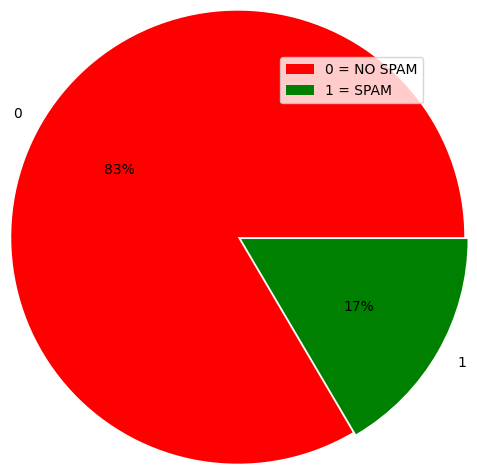

In [20]:
clr=['red','green']
plt.figure(figsize=(10,5),dpi=100)
exp=(0.025,0)
val=df['label'].value_counts().index.tolist()
lb=df['label'].value_counts()
plt.pie(lb,explode=exp,labels=val, autopct='%0.f%%',radius=1.5,colors=clr)
plt.legend(["0 = NO SPAM",'1 = SPAM'])
plt.show()

# Preprocessing Email Messages

In [21]:
df=df.drop('message',axis=1)

In [22]:
df.head()

,index,label,subject+message,length
0,0,0,job posting - apple-iss research centercontent...,2895
1,2,0,query : letter frequencies for text identifica...,1485
2,3,0,riska colleague and i are researching the diff...,328
3,4,0,request book informationearlier this morning i...,1070
4,5,0,call for abstracts : optimality in syntactic t...,4543


# CONVRTING EVERYTHING TO LOWERCASE


In [23]:
df['subject+message']=df['subject+message'].str.lower()

In [24]:
df['subject+message'].str.contains('\n')

0       True
1       True
2       True
3       True
4       True
        ... 
2826    True
2827    True
2828    True
2829    True
2830    True
Name: subject+message, Length: 2831, dtype: bool

In [25]:
df['subject+message'][1]

"query : letter frequencies for text identificationi am posting this inquiry for sergei atamas ( satamas @ umabnet . ab . umd . edu ) , a research associate at the university of maryland at baltimore . his field is molecular biology , and his work involves comparing dna strings using various algorithms . i do n't understand the details well enough to pass them along . at any rate , one such algorithm relies upon frequencies with which the letters g , a , t , and c occur in the dna strings . he would like to explore the analogous use of letter ( sound ) frequencies in natural language texts . hence this posting . specifically , sergei wonders if any linguist subscribers could help steer him to recent literature concerning text identification based on letter frequencies . any suggestions could be sent directly to him at the above address , or to me and i ' ll pass them along . he would also be interested in collaborative work if this research connects with the work of any linguists or te

# Replacing newline( \n ) with Space

In [26]:
df['subject+message']=df['subject+message'].str.replace("\n"," ")

In [27]:
df['subject+message'].str.contains('\n')

0       False
1       False
2       False
3       False
4       False
        ...  
2826    False
2827    False
2828    False
2829    False
2830    False
Name: subject+message, Length: 2831, dtype: bool

# REPLACING URL's BY 'LINKS'

# Example

In [28]:
import re
#x='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html'
x='https://www.youtube.com/watch?v=WuuyD3Yr-js'
ur=re.findall(r'http[s]?://(?:[a-zA-Z0-9]|[./?-]|[=])+',x)  
# IF YOU WANT TO MATCH WITH QUESTIONMARK(?) DONT PLACE THE QUESTION MARK IN THE END OR STARTING OF THE BRACKETS() 
# BECOZ IT WILL GIVE SOME ERROR
ur

['https://www.youtube.com/watch?v=WuuyD3Yr-js']

In [29]:
df['subject+message']=df['subject+message'].str.replace(r'http[s]?://(?:[a-zA-Z0-9]|[./?-]|[=])+','Links')

# REPLACING CURRENCY SIGNS BY 'MONEY'

In [30]:
df[df['subject+message'].str.contains(r'£')]

,index,label,subject+message,length


In [31]:
df[df['subject+message'].str.contains(r'$')]

,index,label,subject+message,length
0,0,0,job posting - apple-iss research centercontent...,2895
1,2,0,query : letter frequencies for text identifica...,1485
2,3,0,riska colleague and i are researching the diff...,328
3,4,0,request book informationearlier this morning i...,1070
4,5,0,call for abstracts : optimality in syntactic t...,4543
...,...,...,...,...
2826,2888,1,love your profile - ysuolvpvhello thanks for s...,290
2827,2889,1,you have been asked to join kiddinthe list own...,2197
2828,2890,0,anglicization of composers ' namesjudging from...,1073
2829,2891,0,"re : 6 . 797 , comparative method : n - ary co...",3003


In [32]:
df['subject+message']=df['subject+message'].str.replace(r'\$', 'Money')

# REPLACING LARGE WHITE SPACE BY SINGLE WHITE SPACE

In [33]:
df['subject+message']=df['subject+message'].str.replace(r'\s+', ' ')

In [34]:
df[df['subject+message'].str.contains(r'^\s+|\s+?$', '')]

,index,label,subject+message,length
0,0,0,job posting - apple-iss research centercontent...,2895
1,2,0,query : letter frequencies for text identifica...,1485
2,3,0,riska colleague and i are researching the diff...,328
3,4,0,request book informationearlier this morning i...,1070
4,5,0,call for abstracts : optimality in syntactic t...,4543
...,...,...,...,...
2826,2888,1,love your profile - ysuolvpvhello thanks for s...,290
2827,2889,1,you have been asked to join kiddinthe list own...,2197
2828,2890,0,anglicization of composers ' namesjudging from...,1073
2829,2891,0,"re : 6 . 797 , comparative method : n - ary co...",3003


# REPLACING MOBILE NO AS CONTACT NUMBERS

In [35]:
df['subject+message']=df['subject+message'].str.replace(r'([\(]*\d{3}[\s-]\d{3}[\s-]\d{4}[\)]*)','contact number')

In [36]:
#x='(213-456-6784)'
x='213-456-6784'
contact=re.findall(r'([\(]*\d{3}[\s-]\d{3}[\s-]\d{4}[\)]*)',x)
contact

['213-456-6784']

In [37]:
df[df['subject+message'].str.contains('contact number')]

,index,label,subject+message,length
39,41,0,icslp 96= = = = = = = = = = = = = = = = = = = ...,11464
54,56,0,salford seminarscontent - length : 2116 univer...,1178
60,62,0,conf : translating literature and filmuniversi...,2247
62,64,0,holding / managing / handi am looking at seman...,802
73,76,0,grammatical relations and derived notionsabout...,2772
...,...,...,...,...
2539,2600,0,austronesian linguisticsmarian klamer a gramma...,2010
2542,2603,0,"negation : syntax , semantics and pragmaticsun...",9665
2711,2772,0,a linguistics consulting assignment ( correcti...,1503
2716,2777,0,"adjectives , terminology , follow-upcolleagues...",681


# REPLACING SPECIAL CHARACTERS  BY WHITE SPACE 

In [38]:
df['subject+message']=df['subject+message'].str.replace(r"[^a-zA-Z0-9]+", " ")

# REPLACING NUMBERS

In [39]:
df['subject+message']=df['subject+message'].str.replace(r'\d+(\.\d+)?','numbers') # even it will replace decimal numbers

In [40]:
#df['subject+message'][39]

In [41]:
df.head()

,index,label,subject+message,length
0,0,0,job posting apple iss research centercontent l...,2895
1,2,0,query letter frequencies for text identificati...,1485
2,3,0,riska colleague and i are researching the diff...,328
3,4,0,request book informationearlier this morning i...,1070
4,5,0,call for abstracts optimality in syntactic the...,4543


In [42]:
stop = stopwords.words('english')
df['Cleaned_text']= df['subject+message'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))

In [43]:
df.tail()

,index,label,subject+message,length,Cleaned_text
2826,2888,1,love your profile ysuolvpvhello thanks for sto...,290,love profile ysuolvpvhello thanks stopping tak...
2827,2889,1,you have been asked to join kiddinthe list own...,2197,asked join kiddinthe list owner kiddin invited...
2828,2890,0,anglicization of composers namesjudging from t...,1073,anglicization composers namesjudging return po...
2829,2891,0,re numbers numbers comparative method n ary co...,3003,numbers numbers comparative method n ary compa...
2830,2892,0,re american english in australiahello i m work...,736,american english australiahello working thesis...


In [44]:
df['lgth_clean']=df['Cleaned_text'].apply(len)
df.head()

,index,label,subject+message,length,Cleaned_text,lgth_clean
0,0,0,job posting apple iss research centercontent l...,2895,job posting apple iss research centercontent l...,2108
1,2,0,query letter frequencies for text identificati...,1485,query letter frequencies text identificationi ...,1150
2,3,0,riska colleague and i are researching the diff...,328,riska colleague researching differing degrees ...,216
3,4,0,request book informationearlier this morning i...,1070,request book informationearlier morning phone ...,653
4,5,0,call for abstracts optimality in syntactic the...,4543,call abstracts optimality syntactic theorycont...,3472


In [45]:
original_length=sum(df['length'])
after_cleaning=sum(df['lgth_clean'])

In [46]:
print("original_length",original_length)
print('after_cleaning',after_cleaning)

original_length 9278085
after_cleaning 6717291


In [47]:
df

,index,label,subject+message,length,Cleaned_text,lgth_clean
0,0,0,job posting apple iss research centercontent l...,2895,job posting apple iss research centercontent l...,2108
1,2,0,query letter frequencies for text identificati...,1485,query letter frequencies text identificationi ...,1150
2,3,0,riska colleague and i are researching the diff...,328,riska colleague researching differing degrees ...,216
3,4,0,request book informationearlier this morning i...,1070,request book informationearlier morning phone ...,653
4,5,0,call for abstracts optimality in syntactic the...,4543,call abstracts optimality syntactic theorycont...,3472
...,...,...,...,...,...,...
2826,2888,1,love your profile ysuolvpvhello thanks for sto...,290,love profile ysuolvpvhello thanks stopping tak...,153
2827,2889,1,you have been asked to join kiddinthe list own...,2197,asked join kiddinthe list owner kiddin invited...,1246
2828,2890,0,anglicization of composers namesjudging from t...,1073,anglicization composers namesjudging return po...,672
2829,2891,0,re numbers numbers comparative method n ary co...,3003,numbers numbers comparative method n ary compa...,1986


In [48]:
# Drop unwanted Variables
df=df.drop(['index','length','subject+message','lgth_clean'],axis=1)

In [49]:
df

,label,Cleaned_text
0,0,job posting apple iss research centercontent l...
1,0,query letter frequencies text identificationi ...
2,0,riska colleague researching differing degrees ...
3,0,request book informationearlier morning phone ...
4,0,call abstracts optimality syntactic theorycont...
...,...,...
2826,1,love profile ysuolvpvhello thanks stopping tak...
2827,1,asked join kiddinthe list owner kiddin invited...
2828,0,anglicization composers namesjudging return po...
2829,0,numbers numbers comparative method n ary compa...


In [50]:
X=df['Cleaned_text']
Y=df['label']

In [51]:
type(X)

pandas.core.series.Series

In [52]:
print(X.shape)
print(Y.shape)

(2831,)
(2831,)


In [53]:
X.head()

0    job posting apple iss research centercontent l...
1    query letter frequencies text identificationi ...
2    riska colleague researching differing degrees ...
3    request book informationearlier morning phone ...
4    call abstracts optimality syntactic theorycont...
Name: Cleaned_text, dtype: object

In [54]:
X.dtype

dtype('O')

In [55]:
Y.dtype

dtype('int64')

In [56]:
Spam=df[df.label==0]
Normal=df[df.label==1]

In [57]:
print(Spam.shape,Normal.shape)

(2363, 2) (468, 2)


In [58]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
2826    1
2827    1
2828    0
2829    0
2830    0
Name: label, Length: 2831, dtype: int64

In [61]:
# 'X' can be array or DataFrame
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=5000)
X_tf = tf.fit_transform(X).toarray()

In [64]:
X_tf[0:3]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.11516803, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [61]:
type(X_tf)

numpy.ndarray

In [62]:
X_tf.shape

(2831, 5000)

In [63]:
# 'X_tf' and 'Y' can be array or DataFrame<br>
# here I have passed X_tf' and 'Y' as an array<br>
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=42)
X_new,Y_new=smk.fit_sample(X_tf,Y)

In [64]:
print(X_new.shape,Y_new.shape)

(4726, 5000) (4726,)


In [65]:
X_new

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.11516803, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new,Y_new, test_size = 0.3, random_state = 225)

In [68]:
print(X_train.shape,X_test.shape)

(3308, 5000) (1418, 5000)


In [69]:
# Just for Testing Created

# lr = LogisticRegression()
# logistic=lr.fit(X_train,Y_train)
# y_pred = logistic.predict(X_test)
# print(confusion_matrix(y_pred,Y_test))
# print("Accuracy : ", accuracy_score(y_pred,Y_test))
# print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
# print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[696   3]
 [  3 716]]
Accuracy :  0.995768688293371
Precision :  0.995768688293371
Recall :  0.995768688293371


In [121]:
lr = LogisticRegression()
knc = KNeighborsClassifier()
abc = AdaBoostClassifier()
mnb = MultinomialNB()
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier(random_state=42)

In [87]:
algorithms=[lr,knc,abc,mnb,gbc,rfc]
for i in algorithms:
    model=i.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    print('-----------------{}----------------'.format(i))
    print(confusion_matrix(y_pred,Y_test))
    print("Accuracy : ", accuracy_score(y_pred,Y_test))
    print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
    print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))
    print()

-----------------LogisticRegression()----------------
[[696   3]
 [  3 716]]
Accuracy :  0.995768688293371
Precision :  0.995768688293371
Recall :  0.995768688293371
-----------------KNeighborsClassifier()----------------
[[266   0]
 [433 719]]
Accuracy :  0.6946403385049366
Precision :  0.883797324810176
Recall :  0.6946403385049366
-----------------AdaBoostClassifier()----------------
[[693   5]
 [  6 714]]
Accuracy :  0.9922425952045134
Precision :  0.9922437444203571
Recall :  0.9922425952045134
-----------------MultinomialNB()----------------
[[692   1]
 [  7 718]]
Accuracy :  0.9943582510578279
Precision :  0.9943947397132616
Recall :  0.9943582510578279
-----------------GradientBoostingClassifier()----------------
[[694   7]
 [  5 712]]
Accuracy :  0.9915373765867419
Precision :  0.9915410192782318
Recall :  0.9915373765867419
-----------------RandomForestClassifier(random_state=42)----------------
[[697   2]
 [  2 717]]
Accuracy :  0.997179125528914
Precision :  0.9971791255289

# BY USING ABOVE TECHNIQUE WE CANT PREDICT NEW OUTPUT VARIABLE 
# AS NEW O/P WILL BE IN TEXT DATA SO BEFORE PREDICTING WE NEED TO DO TFIDF TRANFORM, AS IT CANT BE DONE
# TO OVERCOME THIS PROBLEM WE WILL BE USING PIPELINE TECHNIQUE

In [71]:
result=logistic.predict[['your microsoft account has been compromised'] [',you must update before or else your account going to close click to update']]
result

TypeError: list indices must be integers or slices, not str

In [76]:
result=logistic.predict([['your microsoft account has been compromised'],['you must update before or else your account going to close click to update']])
result

ValueError: X has 1 features per sample; expecting 5000

# BY THIS STACKOVERFLOW METHOD WE HAVE CREATED CREATED THE PIPELINE
# https://stackoverflow.com/questions/54118076/how-to-resample-text-imbalanced-groups-in-a-pipeline

In [98]:
type(X_train)

numpy.ndarray

# Type of the data inside TfidfVectorizer should be Series or Dataframe becoz TfidfVectorizer converts data into lower, 
# since numpy array has no lower operation so it throws error

In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
model = Pipeline([('tfidf', TfidfVectorizer()),
                  ('smk', SMOTETomek(random_state=42)),
                  ('clf', LogisticRegression())])
model = model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [89]:
# https://stackoverflow.com/questions/48758383/all-intermediate-steps-should-be-transformers-and-implement-fit-and-transform

In [90]:
# we below error we will get if we apply 2 ML Algorithms in the PIPELINE
# All intermediate steps of the chain should be estimators that implement fit and transform or fit_resample (but not both) or be a string 'passthrough' 'LogisticRegression()' (type <class 'sklearn.linear_model._logistic.LogisticRegression'>) doesn't)

# PIPELINE :
## Sequentially(In_Order) apply a list of transforms and a final estimator. Intermediate steps of pipeline must implement fit and transform methods and the final estimator only needs to implement fit.

In [135]:
type(X_new)

numpy.ndarray

In [136]:
# X_new, Y_new in in Numpy Array
X_train, X_test, Y_train, Y_test = train_test_split(X_new,Y_new, test_size = 0.3, random_state = 225)

In [137]:
type(df['Cleaned_text'])

pandas.core.series.Series

In [138]:
# df['Cleaned_text'], df['label'] are in Series format
X_train, X_test, Y_train, Y_test = train_test_split(df['Cleaned_text'],df['label'], test_size = 0.3, random_state = 225)

In [139]:
type(X_train)

pandas.core.series.Series

# Without Applying OverSAmpling

# WE ARE USING NAIVE BAYE'S ALGORITHM IN PIPELINE SINCE ITS PERFORMING BETTER than other Algorithms

In [145]:
#model = Pipeline([('tf_vectorizer',tvec),('SMOTETomek',smk)])
from sklearn.metrics import confusion_matrix

pipe = Pipeline([('tfidf', TfidfVectorizer()),
                  ('clf', MultinomialNB())])
pipe = pipe.fit(X_train, Y_train)
y_pred = pipe.predict(X_test)
y_pred = pipe.predict(X_test)

print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[711 117]
 [  0  22]]
Accuracy :  0.8623529411764705
Precision :  0.9782141345746932
Recall :  0.8623529411764705


# WE ARE USING NAIVE BAYE'S ALGORITHM IN PIPELINE SINCE ITS PERFORMING BETTER than other Algorithms

# BY Applying Oversampling

In [146]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('smk', SMOTETomek(random_state=42)),
                 ('clf', MultinomialNB())])
pipe = pipe.fit(X_train, Y_train)
y_pred = pipe.predict(X_test)

print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[704   1]
 [  7 138]]
Accuracy :  0.9905882352941177
Precision :  0.9906069485439201
Recall :  0.9905882352941177


# We cant apply two nlp algorithms CountVectorizer and TfidfVectorizer as well as we cant apply two ML Algorithms in a PIPELINE

In [165]:
pipe = Pipeline([  ('vect', CountVectorizer()),
                    ('tfidf', TfidfVectorizer()),
                    ('smk', SMOTETomek(random_state=42)),
                    ('clf', MultinomialNB())])
pipe = pipe.fit(X_train, Y_train)
y_pred = pipe.predict(X_test)

print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

AttributeError: lower not found

# Testing Model

In [147]:
X_train

2483    french grad student conferenceappel de communi...
146     studies sla hungarian currently writing phd se...
556     tried calling please call free internet servic...
1054    serious future future comes opportunity capita...
2339    conference leuven numbers numbers numbers numb...
                              ...                        
2093    numbers numbers languagesin context speaks lan...
2303    numbersth int workshop parsing technologies pr...
1198    transcription workshop coling aclnumbers call ...
498     nineteenth south asian languages analysis roun...
2336    sociolinguisticsmichael g smith language power...
Name: Cleaned_text, Length: 1981, dtype: object

In [148]:
result=pipe.predict(['your microsoft account has been compromised ,you must update before or else your account going to close click to update'])
result

array([1])

In [149]:
result=pipe.predict(['Today we want to inform you that the application period for 15.000 free Udacity Scholarships in Data Science is now open! Please apply by November 16th, 2020 via https://www.udacity.com/bertelsmann-tech-scholarships.'])
result

array([1])

 Here 0 is spam and 1 is normal message.

#  EOF DONE CLASSIFICATION OF SPAM CLASSIFICATION 